In [1]:
import pandas as pd
from sqlalchemy import create_engine

server = "DESKTOP-FJL3DTT\\SQLEXPRESS"  
database = "SuperstoreDB"

# connection string with trusted connection
conn_str = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

engine = create_engine(conn_str)


In [5]:
query = "select * from vw_Sales_Summary_Category"
df_category = pd.read_sql(query, engine)
df_category = df_category[['Category', 'Sub_Category', 'Total_Sales', 'Total_Profit', 'No_of_Products_Sold']]
df_category.head()


,Category,Sub_Category,Total_Sales,Total_Profit,No_of_Products_Sold
0,OFFICE SUPPLIES,ART,27199.75,6554.2,3030
1,FURNITURE,CHAIRS,330609.76,26721.4,2405
2,OFFICE SUPPLIES,FASTENERS,3024.25,949.7,914
3,FURNITURE,FURNISHINGS,98626.30,14569.8,3821
4,OFFICE SUPPLIES,ENVELOPES,16476.38,6963.9,906


In [6]:
df_category.corr(numeric_only = True)

,Total_Sales,Total_Profit,No_of_Products_Sold
Total_Sales,1.000000,0.441240,0.270427
Total_Profit,0.441240,1.000000,0.443842
No_of_Products_Sold,0.270427,0.443842,1.000000


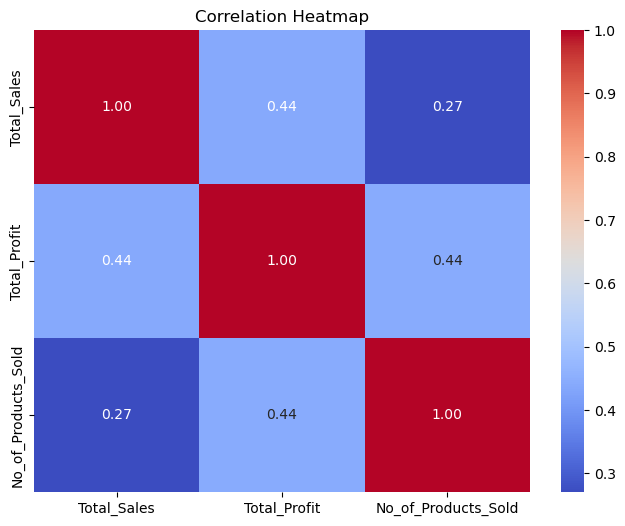

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_category.corr(numeric_only = True)
#plot it as heatmap
plt.figure(figsize = (8,6)) 
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


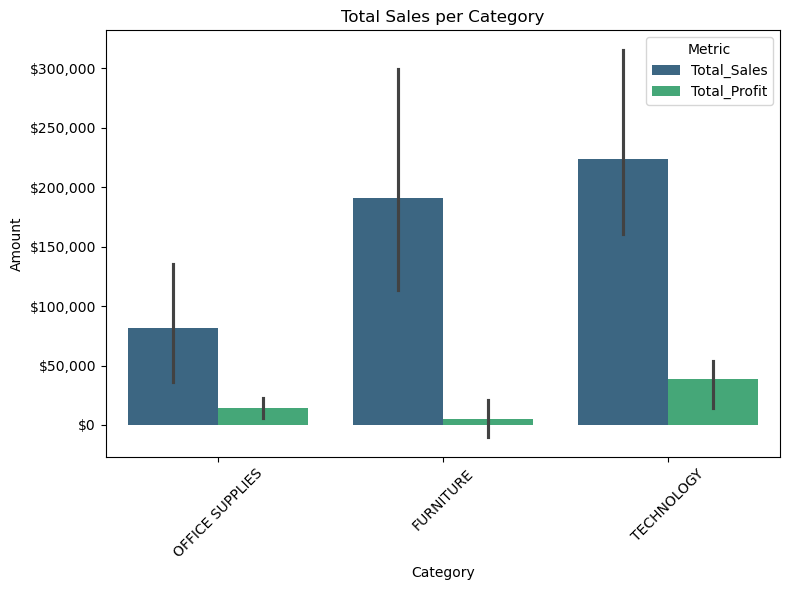

In [12]:
#Total Sales and Profit by Category
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker 
#Melt the dataframe into long format for stacked plotting.
df_cat_melted = df_category.melt(id_vars='Category',value_vars=['Total_Sales','Total_Profit'],var_name='Metric',value_name='Amount')

plt.figure(figsize = (8,6))
#create bar Plot
ax= sns.barplot(df_cat_melted, x='Category',y='Amount', hue='Metric',palette='viridis')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
#add labels and titles
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

### Total Sales and profit

- Technology leads in both Sales and Profit, making it the most lucrative category.
- Furniture have decent sales but lower profits, suggesting room for margin improvement.
- Office Supplies have lowest sales,indicating targeted promotions could help boost the Sales

C:\Users\Balamurugan\AppData\Local\Temp\ipykernel_17684\2161044490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x ='Sub_Category', y='Total_Sales', palette = 'Blues')


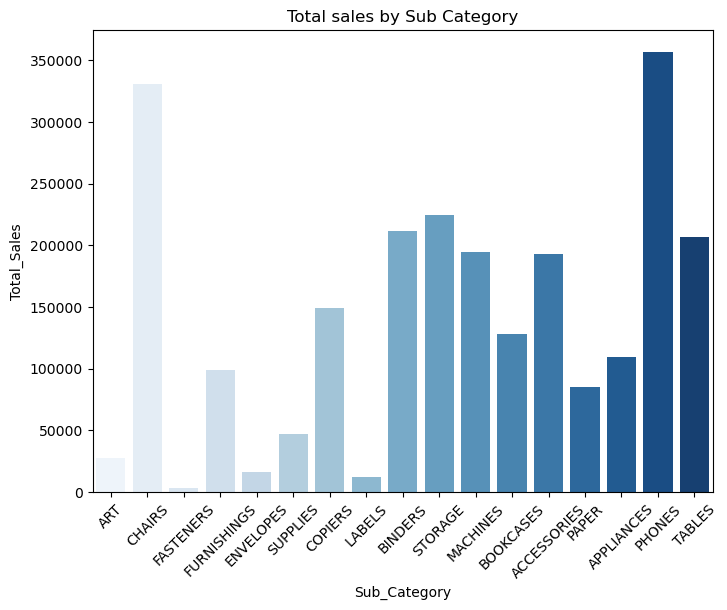

In [6]:
plt.figure(figsize = (8,6))

sns.barplot(data = df, x ='Sub_Category', y='Total_Sales', palette = 'Blues')

#add labels and title
plt.title('Total sales by Sub Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total_Sales')
plt.xticks(rotation = 45)

plt.show()

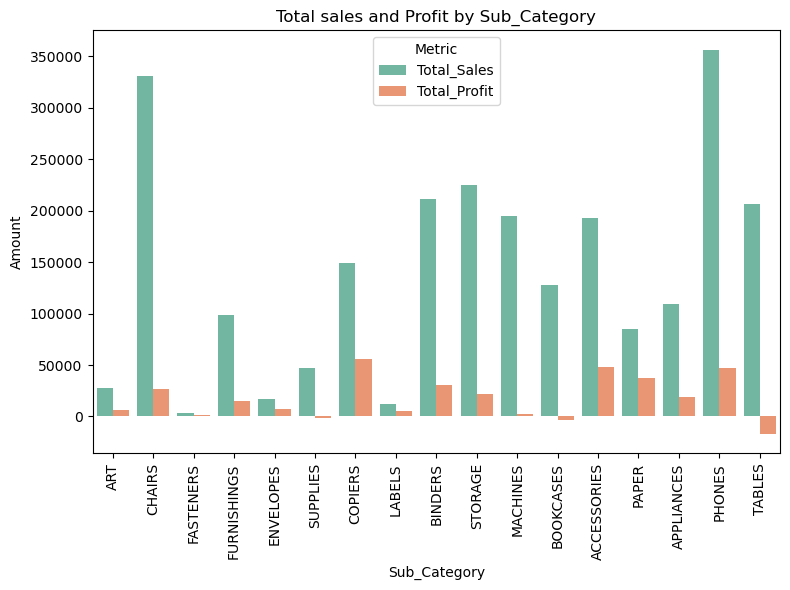

In [7]:
#melt dataframe
df_melted = df.melt(id_vars = 'Sub_Category',value_vars = ['Total_Sales','Total_Profit'],  var_name = 'Metric', value_name = 'Amount')

#plot the data in barchart

plt.figure(figsize = (8,6))
sns.barplot(data = df_melted, x = 'Sub_Category', y='Amount', hue ='Metric',palette = 'Set2')

#add title and labels
plt.title('Total sales and Profit by Sub_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Amount')
plt.xticks(rotation =90)
plt.tight_layout()

plt.show()



### Total Sales and Profit by Sub-category
### Insight:
-Phones are the most profitable and high-performing sub-category, indicating strong market demand and effective pricing.
-Tables and Bookcases, despite high sales volumes, are generating negative profits, suggesting high production or delivery costs, excessive discounting, or inefficient pricing strategies.
-Other sub-categories exhibit moderate profit margins, indicating further planning in cost and promotions

### Business Implications:
-Focus on expanding marketing and inventory for Phones to maximize revenue and profit.
-Analyze cost, pricing and discounts for loss-making sub-categories like Tables and Bookcases.
-Consider promotional campaigns or bundle offers for underperforming sub-categories with growth potential. 

In [8]:
df.index

RangeIndex(start=0, stop=17, step=1)

In [9]:
df_orders = pd.read_sql('select * from orders_fact',engine)

In [10]:
df.head()


,Category,Sub_Category,Total_Sales,Total_Profit,No_of_Products_Sold
0,OFFICE SUPPLIES,ART,27199.75,6554.2,3030
1,FURNITURE,CHAIRS,330609.76,26721.4,2405
2,OFFICE SUPPLIES,FASTENERS,3024.25,949.7,914
3,FURNITURE,FURNISHINGS,98626.30,14569.8,3821
4,OFFICE SUPPLIES,ENVELOPES,16476.38,6963.9,906


In [11]:
df_orders.head()

,Order_key,Order_ID,Customer_Key,Product_Key,Sales,Quantity,Discount,Profit,Address_Key,Orderdatekey,Shipdatekey,Cost_Per_Unit,Discount_flag,IS_Loss
0,1,CA-2011-100006,217,1782,377.97,3,0.0,109.6,1293,20110907,20110913,89.46,False,False
1,2,CA-2011-100090,247,366,502.49,3,0.2,-87.9,1506,20110708,20110712,196.80,True,True
2,3,CA-2011-100090,247,710,196.70,6,0.2,68.8,1506,20110708,20110712,21.32,True,False
3,4,CA-2011-100293,562,1041,91.06,6,0.2,31.9,3455,20110314,20110318,9.86,True,False
4,5,CA-2011-100328,345,664,3.93,1,0.2,1.3,2115,20110129,20110204,2.63,True,False


In [12]:
Sales_grouped_byCust= df_orders.groupby('Customer_Key')[['Sales','Quantity']].sum().sort_values(by='Sales', ascending = False).head(10)
Sales_grouped_byCust

,Sales,Quantity
Customer_Key,,
701,25073.84,52
742,19113.62,47
312,15984.75,117
622,15117.35,71
7,14818.27,75
731,14595.62,36
670,14398.10,91
435,14228.95,117
328,12873.30,50


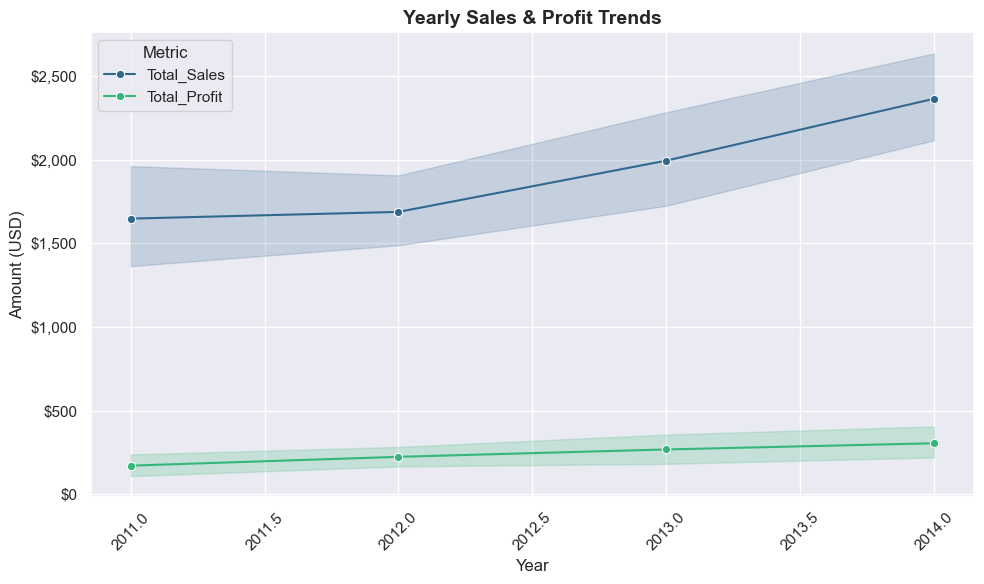

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker  # For custom ticks

# Load the sales summary data
df_Sales = pd.read_sql("SELECT * FROM vw_Sales_Summary_Time", engine)

# Melt the data: Convert wide to long format for seaborn
df_Sales_melt = df_Sales.melt(
    id_vars='Year',
    value_vars=['Total_Sales', 'Total_Profit'],
    var_name='Metric',
    value_name='Amount'
)

# Ensure Year is sorted properly (especially if it's a string)
df_Sales_melt['Year'] = pd.Categorical(df_Sales_melt['Year'], ordered=True)

# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Create the line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=df_Sales_melt,
    x='Year',
    y='Amount',
    hue='Metric',
    palette='viridis',
    marker='o'
)



# Format y-axis as currency
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add chart title and axis labels
ax.set_title("Yearly Sales & Profit Trends", fontsize=14, fontweight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Amount (USD)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
import numpy as np

orders = pd.read_sql("SELECT * FROM Orders_Fact", engine)
Date = pd.read_sql("SELECT * FROM Date_Dim", engine)

orders.head()
#Date.head()



,Order_key,Order_ID,Customer_Key,Product_Key,Sales,Quantity,Discount,Profit,Address_Key,Orderdatekey,Shipdatekey,Cost_Per_Unit,Discount_flag,IS_Loss
0,1,CA-2011-100006,217,1782,377.97,3,0.0,109.6,1293,20110907,20110913,89.46,False,False
1,2,CA-2011-100090,247,366,502.49,3,0.2,-87.9,1506,20110708,20110712,196.80,True,True
2,3,CA-2011-100090,247,710,196.70,6,0.2,68.8,1506,20110708,20110712,21.32,True,False
3,4,CA-2011-100293,562,1041,91.06,6,0.2,31.9,3455,20110314,20110318,9.86,True,False
4,5,CA-2011-100328,345,664,3.93,1,0.2,1.3,2115,20110129,20110204,2.63,True,False


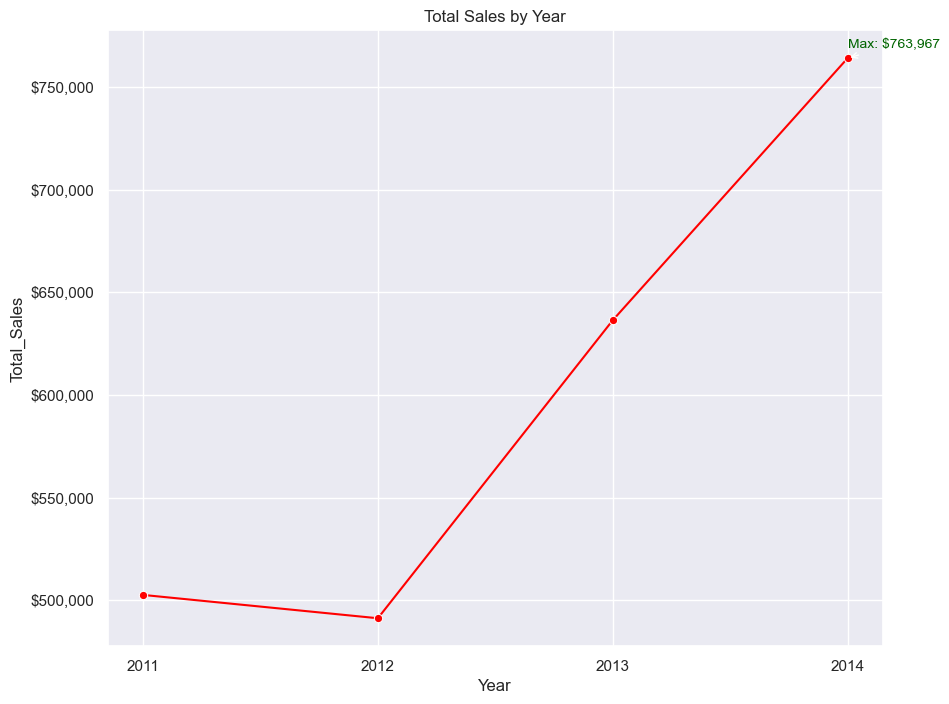

In [16]:
#get Orders and Date table data
import numpy as np
orders = pd.read_sql("SELECT * FROM Orders_Fact", engine)
Date = pd.read_sql("SELECT * FROM Date_Dim", engine)

#Merge the tables and Group by to get Total_Sales per Year
df_Orders_Year = pd.merge(orders,Date, left_on='Orderdatekey', right_on='Date_Key', how = 'left')
df_Orders_Year = df_Orders_Year.groupby('Year')[['Sales']].sum().sort_values(by='Sales', ascending=False).reset_index()

#set seaborn theme
sns.set_theme(style ='darkgrid')

#create linechart
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=df_Orders_Year, x='Year', y='Sales', color='red', marker='o')

#format y axis using mtick formatter
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

#Annotate maximum Sales

max_row = df_Orders_Year[df_Orders_Year['Sales'] == df_Orders_Year['Sales'].max()]
max_year = int(max_row['Year'].values[0])
max_sales = max_row['Sales'].values[0]

plt.annotate(
            f'Max: ${max_sales:,.0f}',
            xy =(max_year,max_sales),
            xytext=(max_year,max_sales+5000),
            arrowprops = dict(facecolor='green',arrowstyle='->'),
            fontsize=10, 
            color='darkgreen'
)
#Create title and labels
ax.set_title("Total Sales by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total_Sales")
plt.xticks(np.arange(2011,2015,1))

plt.show()



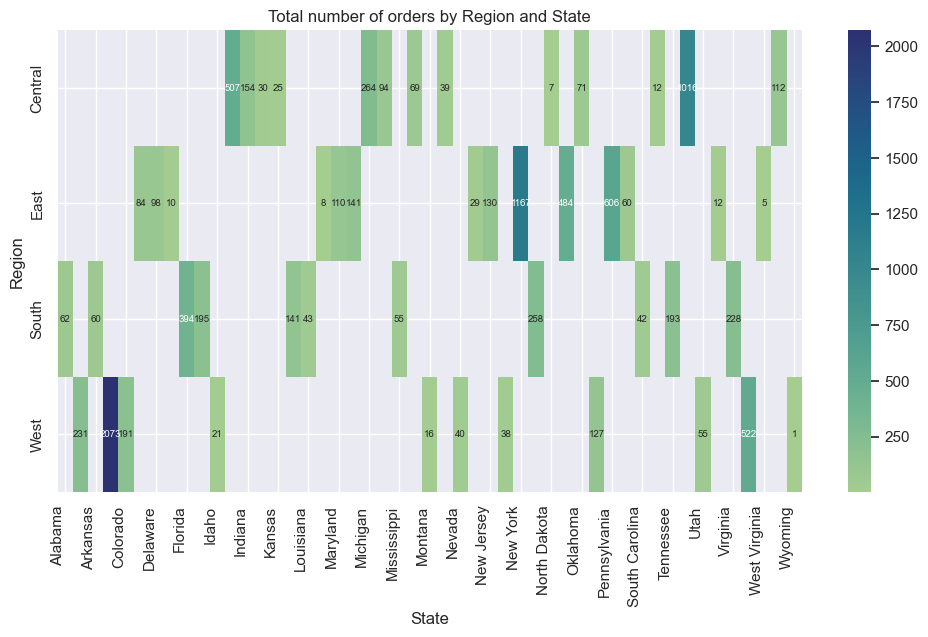

In [17]:
#heatmap visualization for total num of Orders by region and State

region = pd.read_sql("Select * from Address_Dim", engine)
region.rename(columns={'Address_key':'Address_Key'}, inplace = True)
region.head()

#merge Orders and region dataframe
df_ord_reg = pd.merge(orders, region, on='Address_Key', how='left')
df_ord_reg_grp= df_ord_reg.groupby(['Region','State'])[['Order_ID']].count().reset_index() #group by country 
df_ord_reg_grp = df_ord_reg_grp.rename(columns={'Order_ID':'Total_Orders'})

#create Pivot table(2D) for heatmap
df_ord_reg_grp = df_ord_reg_grp.pivot(index='Region',columns='State',values='Total_Orders')

#Plot Heatmap
plt.figure(figsize=(12,6))
ax= sns.heatmap(df_ord_reg_grp, cmap='crest', annot=True, fmt='.0f',annot_kws={"size":7})
plt.xticks(rotation=90, ha='right')
plt.title('Total number of orders by Region and State')

plt.show()



### Total number of Orders by Region and State
# Insight:
- New York, Pennsylvania, and Oklahoma have the highest number of orders, showing strong customer activity in the East.
- In the West, states like Colorado and West Virginia also have good order volumes, while Wyoming shows very few orders.
- Most Southern states have less than 400 orders, showing lower customer engagement.
- In the Central region, only Utah and Indiana show moderate to high order volumes, others are on the lower side.

# What This Means:
- There’s a chance to increase orders in low-performing states by improving marketing, awareness, or product availability.
- High-order states could be used as benchmarks to understand what’s working well (e.g., customer preferences, delivery speed, etc.).
- Use this data to prioritize regional strategies and identify where to focus efforts to grow.

In [16]:
customers=pd.read_sql("select * from Customer_Dim", engine)

customers.head()


,Customer_key,Customer_ID,Customer_Name,Segment
0,1,AA-10315,ALEX AVILA,Consumer
1,2,AA-10375,ALLEN ARMOLD,Consumer
2,3,AA-10480,ANDREW ALLEN,Consumer
3,4,AA-10645,ANNA ANDREADI,Consumer
4,5,AB-10015,AARON BERGMAN,Consumer


In [17]:
customers['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [18]:
customers.columns

Index(['Customer_key', 'Customer_ID', 'Customer_Name', 'Segment'], dtype='object')

In [25]:




customers.head()

,Customer_key,Customer_ID,Customer_Name,Segment
0,1,AA-10315,ALEX AVILA,Consumer
1,2,AA-10375,ALLEN ARMOLD,Consumer
2,3,AA-10480,ANDREW ALLEN,Consumer
3,4,AA-10645,ANNA ANDREADI,Consumer
4,5,AB-10015,AARON BERGMAN,Consumer


In [34]:
customers.rename(columns={'Customer_key':'Customer_Key'}, inplace=True) 


In [35]:
orders.head()

,Order_key,Order_ID,Customer_Key,Product_Key,Sales,Quantity,Discount,Profit,Address_Key,Orderdatekey,Shipdatekey,Cost_Per_Unit,Discount_flag,IS_Loss
0,1,CA-2011-100006,217,1782,377.97,3,0.0,109.6,1293,20110907,20110913,89.46,False,False
1,2,CA-2011-100090,247,366,502.49,3,0.2,-87.9,1506,20110708,20110712,196.80,True,True
2,3,CA-2011-100090,247,710,196.70,6,0.2,68.8,1506,20110708,20110712,21.32,True,False
3,4,CA-2011-100293,562,1041,91.06,6,0.2,31.9,3455,20110314,20110318,9.86,True,False
4,5,CA-2011-100328,345,664,3.93,1,0.2,1.3,2115,20110129,20110204,2.63,True,False


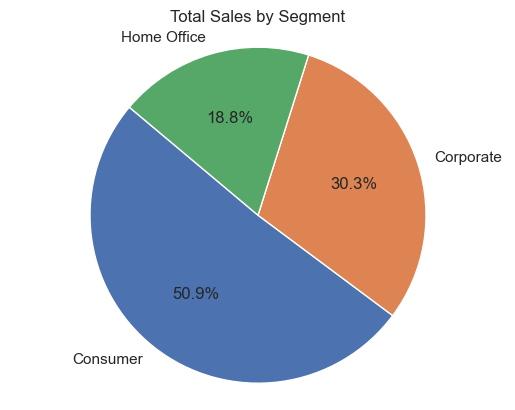

In [40]:
#create pie chart to show total Sales by customer Segment
df_ord_cust = pd.merge(orders, customers, on='Customer_Key', how='left')

#group by Segment and sum sales
df_seg_grp = df_ord_cust.groupby('Segment')['Sales'].sum().reset_index()

#create figure and ax and create piechart
figure, ax=plt.subplots()


ax.pie(df_seg_grp['Sales'] , labels=df_seg_grp['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Segment')
plt.axis('equal')
plt.show()
    


 # Insight:
- Consumers account for the majority of sales (50.9%), making them the most important customer group.
- Corporate clients contribute 30.3%, showing strong engagement from business buyers.
- Home Office customers bring in 18.8%, indicating a smaller but still valuable segment.

# Bussiness implication:
- Consumer-focused strategies should remain a top priority, more offers and promotions targeting here could maximize revenue.
- There’s growth potential in the Home Office segment through tailored promotions or bundled deals.

In [42]:
print(Date.columns)

Index(['Date_Key', 'Full_Date', 'Day', 'Month', 'Month_name', 'Quarter',
       'Year', 'Day_Name', 'IS_Weekend'],
      dtype='object')


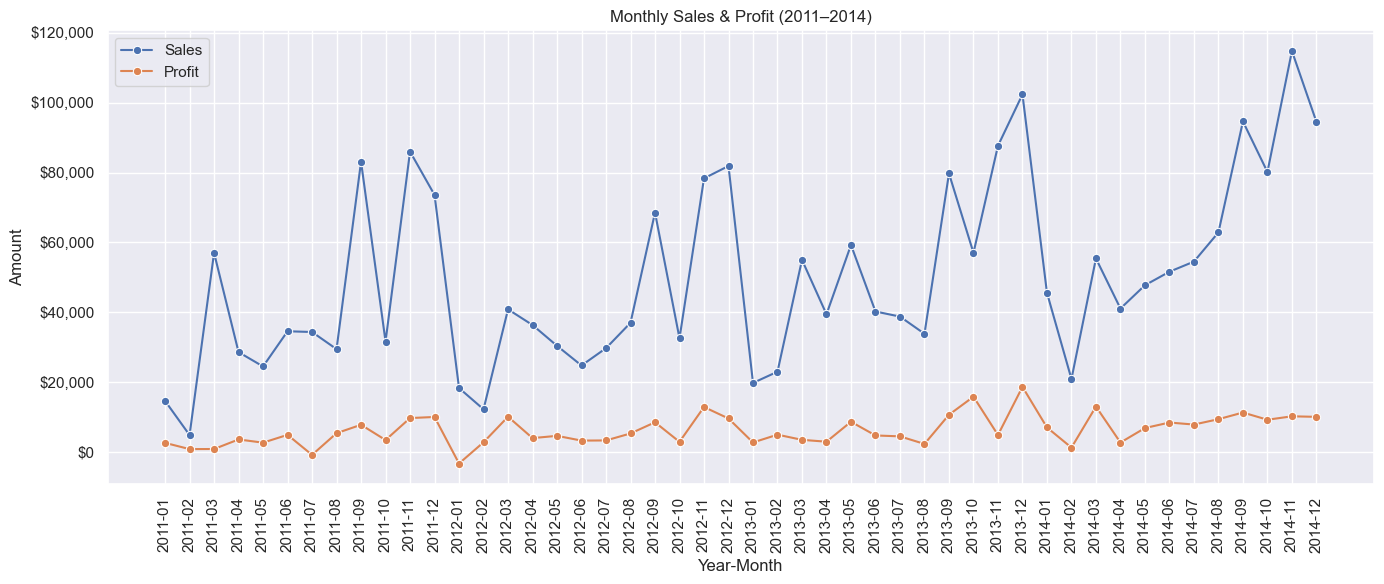

In [50]:
# Merge orders with date table
df = pd.merge(orders, Date, left_on='Orderdatekey', right_on='Date_Key', how='left')

# Create 'Year-Month' for time series
df['Year_Month'] = pd.to_datetime(df['Full_Date']).dt.to_period('M').astype(str)

# Group by Year-Month and aggregate Sales and Profit
df_grouped = df.groupby('Year_Month')[['Sales', 'Profit']].sum().reset_index()

# Plot Line Chart
plt.figure(figsize=(14,6))
sns.lineplot(data=df_grouped, x='Year_Month', y='Sales', label='Sales', marker='o')
sns.lineplot(data=df_grouped, x='Year_Month', y='Profit', label='Profit', marker='o')

#format Y axis
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.title('Monthly Sales & Profit (2011–2014)')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### Monthly Sales and Profit
This chart shows there is Sales growth in Q4 and a notable Sales drop in the following months Jan and Feb

### Insights:
-Sales peak in November and December, driven by holiday promotions and seasonal demand.

-To maximize sales and profit, consider optimizing marketing campaigns and discount strategies during this period.

-Inventory planning should align with the Q4 surge, and extending offers into January may help reduce the post-holiday dip.